In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.metrics
import warnings

warnings.filterwarnings('ignore')

#load data
df = pd.read_csv('insurance.csv')
df = df.dropna()
df.head()

#general information
#df.describe()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [3]:
df['charges'].median()

9382.033

Data distribution analysys


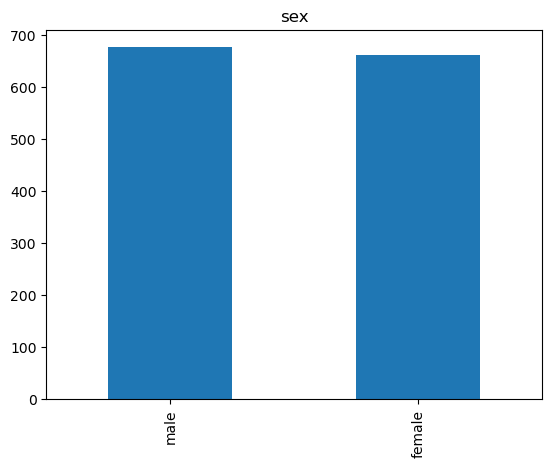

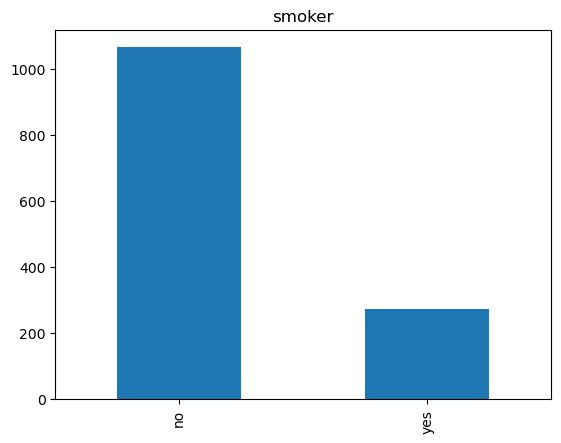

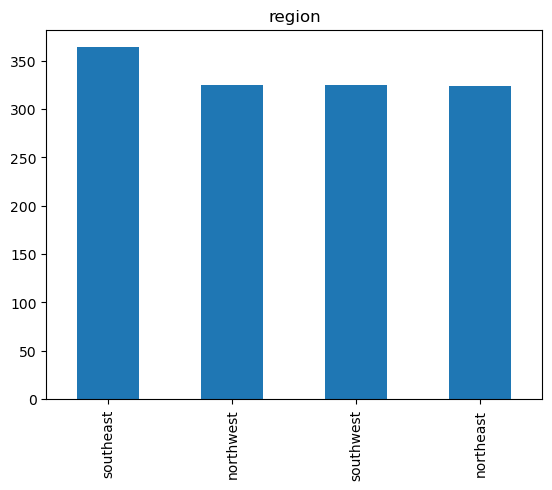

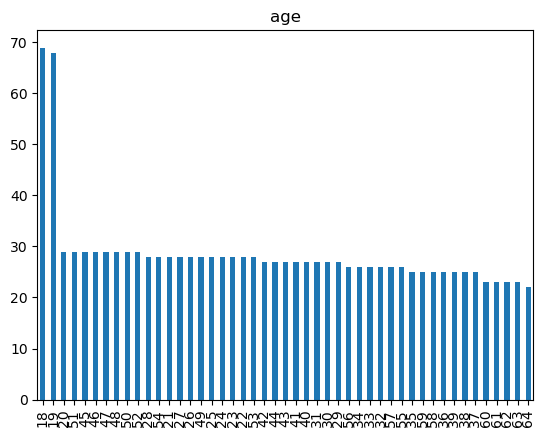

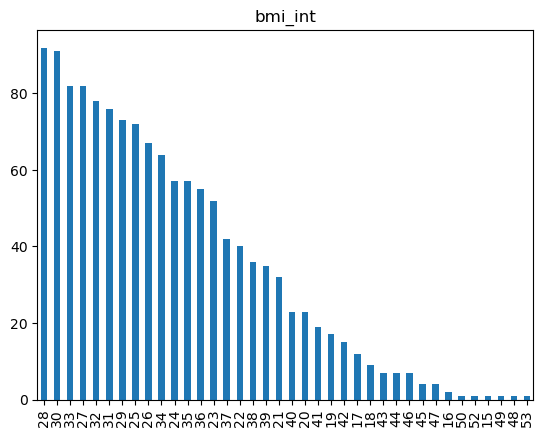

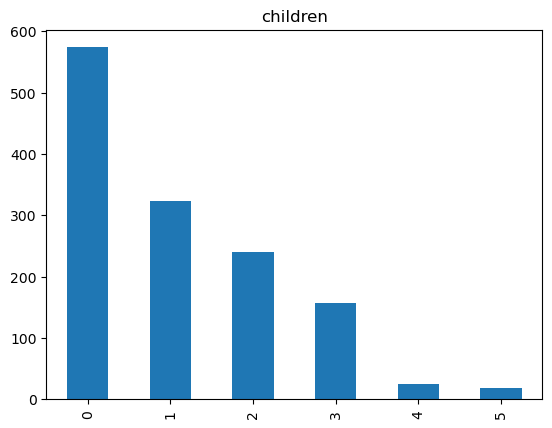

In [4]:
df['bmi_int'] = df['bmi'].apply(lambda x: int(x))
variables = ['sex','smoker','region','age','bmi_int','children']

# data distribution analysys
print('Data distribution analysys')
for v in variables:
    df = df.sort_values(by=[v])
    df[v].value_counts().plot(kind = 'bar')
    plt.title(v)
    plt.show()

Mean cost analysis:


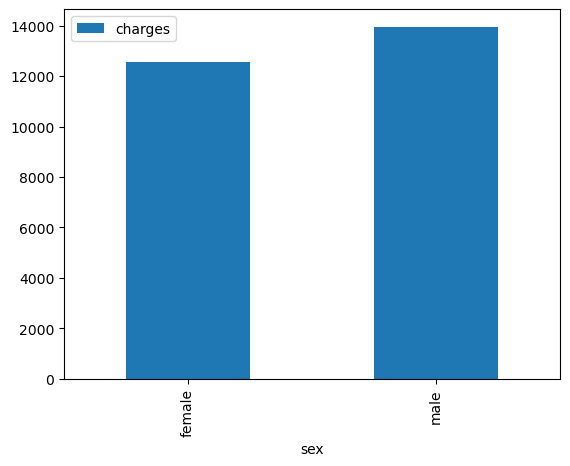

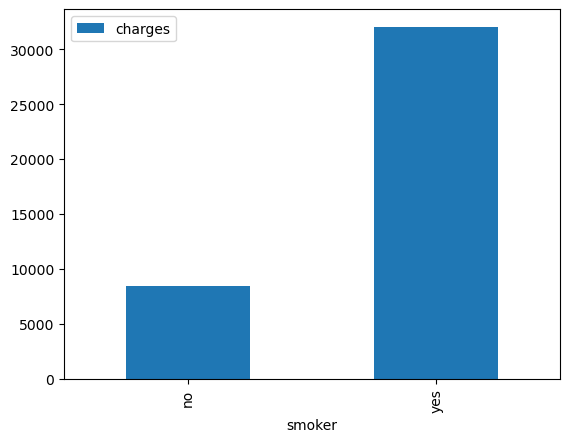

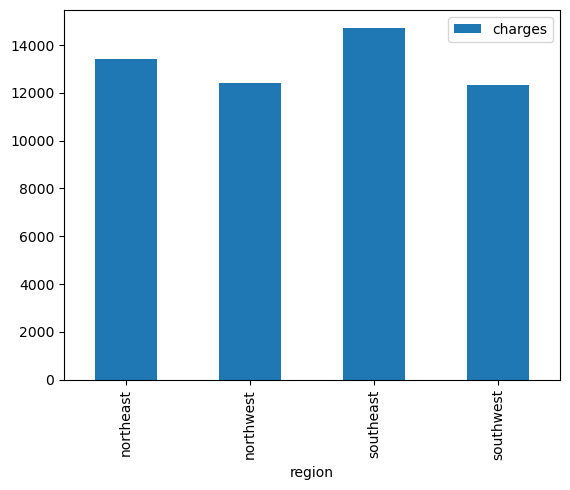

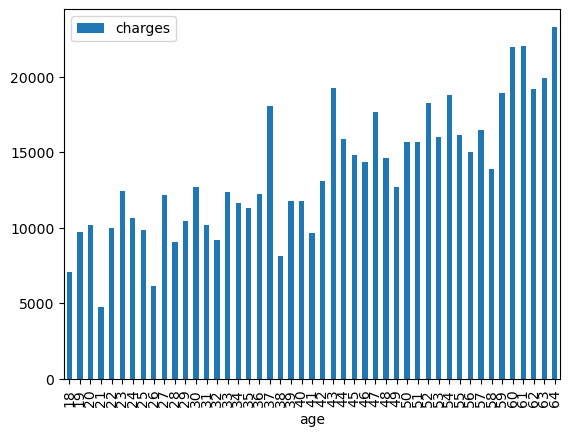

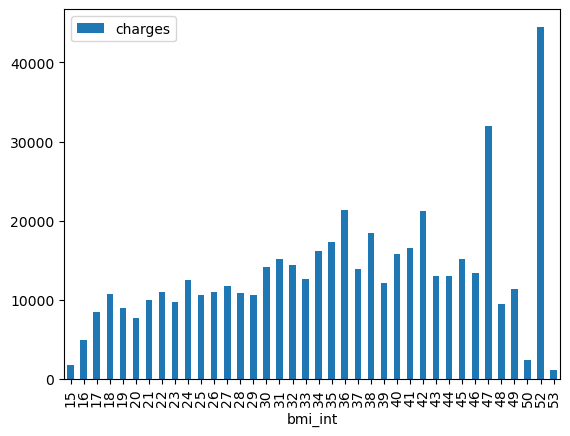

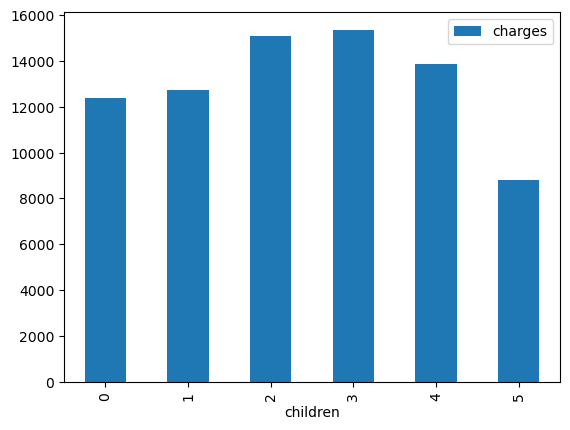

In [5]:
#average cost analyis
print('Mean cost analysis:')
for v in variables:
    group_df = df.groupby(pd.Grouper(key=v)).mean()
    group_df = group_df.sort_index()
    group_df.plot(y = ['charges'],kind = 'bar')
    plt.show()

Variables pairplot:


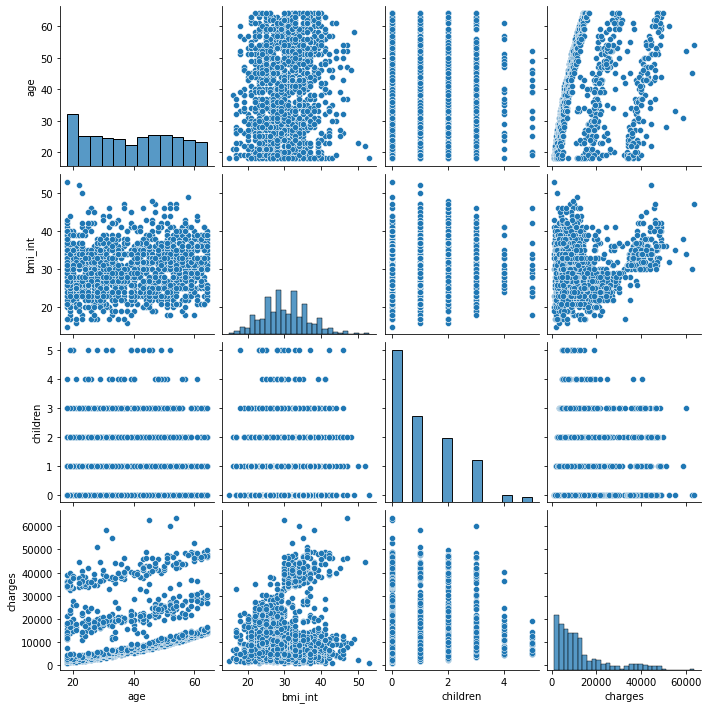

In [5]:
#variables pairplot
print('Variables pairplot:')
variables = ['sex','smoker','region','age','bmi_int','children','charges']
sns_plot = sns.pairplot(df[variables])
plt.show()

In [6]:
print('Model training and evaluating\n\n')
#transform categorical data
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_region = LabelEncoder()

df['sex'] = le_sex.fit_transform(df['sex'])
df['smoker'] = le_smoker.fit_transform(df['smoker'])
df['region'] = le_region.fit_transform(df['region'])

variables = ['sex','smoker','region','age','bmi','children']

X = df[variables]
sc = StandardScaler()
X = sc.fit_transform(X) 
Y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

#train model
regressor = ExtraTreesRegressor(n_estimators = 200)
regressor.fit(X_train,y_train)

Model training and evaluating




ExtraTreesRegressor(n_estimators=200)

Extra Trees Regressor is a machine learning algorithm that belongs to the family of ensemble methods, which combine multiple individual models to improve the overall performance of a predictive model. Extra Trees Regressor is a variation of the Random Forest algorithm, which also belongs to the ensemble family.

The Extra Trees Regressor builds a large number of decision trees, each trained on a random subset of the training data and using a random subset of the features. Then, for a new data point, the algorithm takes the average prediction of all the decision trees to generate the final prediction.

The "extra" in Extra Trees Regressor comes from the fact that the algorithm adds an extra layer of randomness by using random thresholds for each feature instead of finding the optimal split point, as done in regular decision trees. This extra layer of randomness helps to reduce overfitting and improve the algorithm's generalization ability.

Extra Trees Regressor is often used in regression problems where the input variables have complex relationships with the output variable, and where the dataset contains noise or outliers. It is known to be a robust algorithm that can handle noisy data and is relatively insensitive to hyperparameter tuning.

In [7]:
#prediction and evaluation
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

print('ExtraTreesRegressor evaluating result:')
print("Train MAE: ", sklearn.metrics.mean_absolute_error(y_train, y_train_pred))
print("Train RMSE: ", np.sqrt(sklearn.metrics.mean_squared_error(y_train, y_train_pred)))
print("Test MAE: ", sklearn.metrics.mean_absolute_error(y_test, y_test_pred))
print("Test RMSE: ", np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_test_pred)))

ExtraTreesRegressor evaluating result:
Train MAE:  17.889135373862846
Train RMSE:  413.77689999135333
Test MAE:  2560.4029213804124
Test RMSE:  5143.2501667770985


The Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) are both metrics commonly used to evaluate the performance of regression models. Lower values of both RMSE and MAE indicate better performance of the model, with a RMSE and MAE of 0 indicating a perfect fit to the data.

Typically, the RMSE is a more popular metric than MAE as it gives more weight to larger errors. This means that the RMSE is more sensitive to outliers in the data, which may or may not be desirable depending on the specific problem.

To determine if a model is a good predictor or not based on RMSE and MAE, it's best to compare these metrics to a baseline model or to previously established benchmarks. For example, if you're working on a stock price prediction problem and your RMSE is 10, you could compare that to other models or approaches that have been used for the same problem in the past to see if your model is performing well or not.

Additionally, it's important to keep in mind the context of the problem you're working on and what level of accuracy is acceptable for that context. For example, a small RMSE might be acceptable in some problems, but it may be unacceptable in others, such as in medical diagnosis where a small error could have serious consequences.

In summary, to determine if a model is a good predictor or not based on RMSE and MAE, it's best to compare these metrics to a baseline or previously established benchmarks, as well as consider the context of the problem being solved.





Feature importance ranking


1.smoker(0.625470)
2.bmi(0.195854)
3.age(0.123107)
4.children(0.024047)
5.region(0.022588)
6.sex(0.008934)


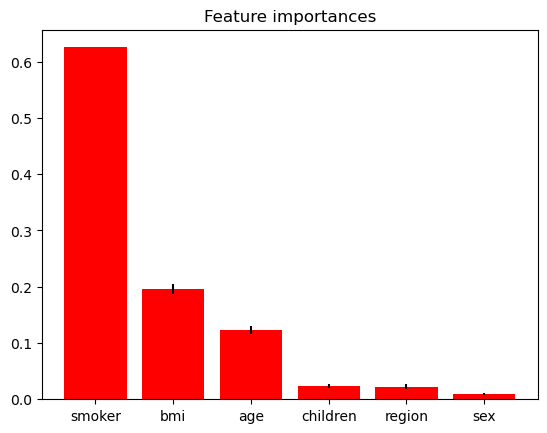

In [8]:
print('Feature importance ranking\n\n')
importances = regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in regressor.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

importance_list = []
for f in range(X.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="r", yerr=std[indices], align="center")
plt.show()

In [9]:
print('Predicting on new data\n\n')

billy = ['male','yes','southeast',25,30.5,2]
print('Billy - ',str(billy))

billy[0] = le_sex.transform([billy[0]])[0] 
billy[1] = le_smoker.transform([billy[1]])[0] 
billy[2] = le_region.transform([billy[2]])[0] 

X = sc.transform([billy])

cost_for_billy = regressor.predict(X)[0]
print('Cost for Billy = ',cost_for_billy,'\n\n')


dennis = ['female','no','southeast',45,19,0]
print('Dennis - ',str(dennis))

dennis[0] = le_sex.transform([dennis[0]])[0] 
dennis[1] = le_smoker.transform([dennis[1]])[0] 
dennis[2] = le_region.transform([dennis[2]])[0] 

X = sc.transform([dennis])

cost_for_dennis = regressor.predict(X)[0]

print('Cost for Dennis = ',cost_for_dennis)

Predicting on new data


Billy -  ['male', 'yes', 'southeast', 25, 30.5, 2]
Cost for Billy =  34285.459915149964 


Dennis -  ['female', 'no', 'southeast', 45, 19, 0]
Cost for Dennis =  16667.23668314999
